# Лабораторная работа 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

Реализовать вейвлет Морле во временном пространстве. Посмотреть его
спектр.
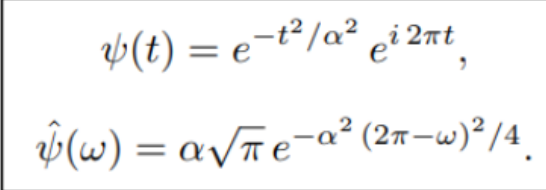

In [2]:
def Morle_time(t):
    a = 1
    return np.exp(-(t**2)/a**2) * np.exp(1j*2*np.pi*t)

In [3]:
def Morle_freq(w):
    a2 = 2
    return a2*np.sqrt(np.pi)*np.exp(-a2**2*(2*np.pi-w)**2/4)

In [4]:
time = np.arange(-6,6, 0.01)
morle_t = []
for i in range(len(time)):
    morle_t.append(Morle_time(time[i]))

D:\conda\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


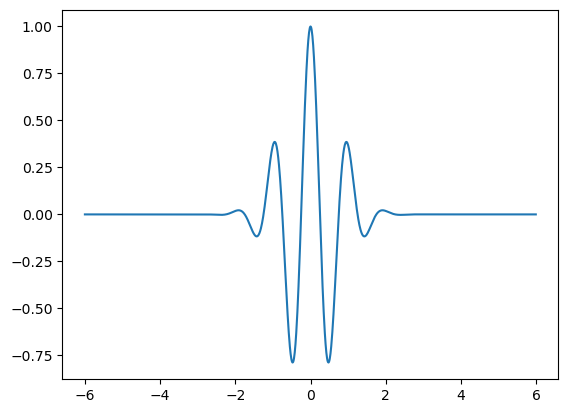

In [5]:
plt.plot(time, morle_t)
plt.show()

In [6]:
freq = np.arange(0,12,0.01)
morle_f = []
for i in range(len(freq)):
    morle_f.append(Morle_freq(freq[i]))

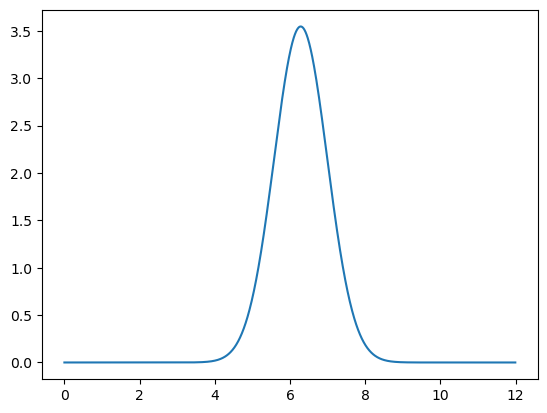

In [7]:
plt.plot(freq, morle_f)
plt.show()

----------------

Реализовать вейвлет “Мексиканская шляпа” во временном пространстве.
Посмотреть его спектр.
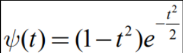

In [8]:
def Mexican_hat(t):
    return (1-t**2)*np.exp(-(t**2/2))

In [9]:
mexican_h = []
for i in range(len(time)):
    mexican_h.append(Mexican_hat(time[i]))

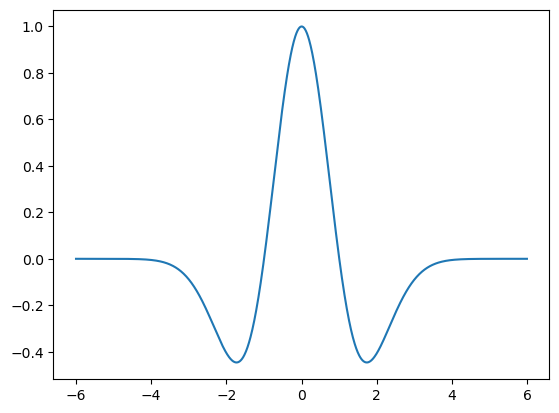

In [10]:
plt.plot(time, mexican_h)
plt.show()

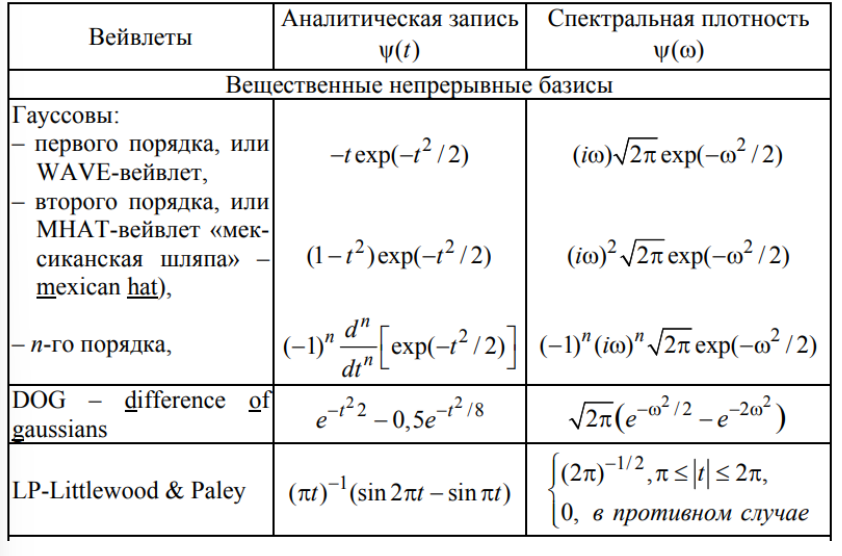

In [11]:
def Mexican_hat_freq(w):
    return np.sqrt(2*np.pi)**2*np.exp(-(w**2/2))*(w*1j)**2

In [12]:
mexican_f = []
for i in range(len(freq)):
    mexican_f.append(Mexican_hat_freq(freq[i]))

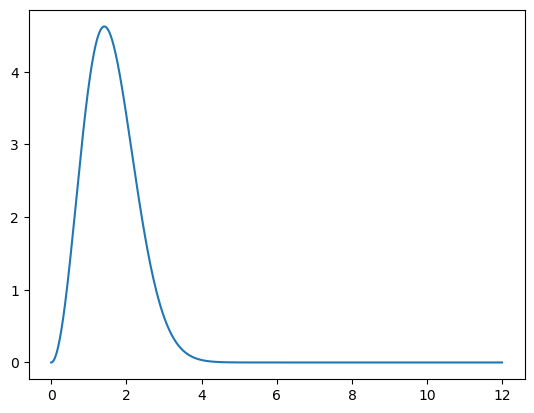

In [13]:
plt.plot(freq, np.abs(mexican_f))
plt.show()

----------------

Реализовать вейвлет Хаара во временном пространстве. Посмотреть его спектр.
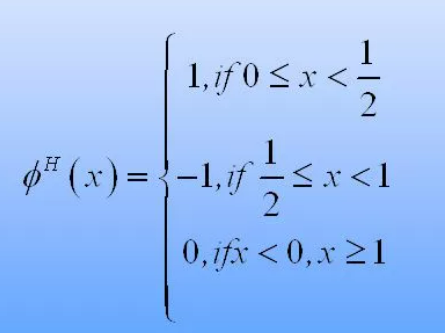

In [14]:
def haar(x):
    if x>=0 and x<1/2:
        return 1
    if x>=1/2 and x<1:
        return -1
    if x<0 or x>=1:
        return 0

In [15]:
haar_t = []
for i in range(len(time)):
    haar_t.append(haar(time[i]))

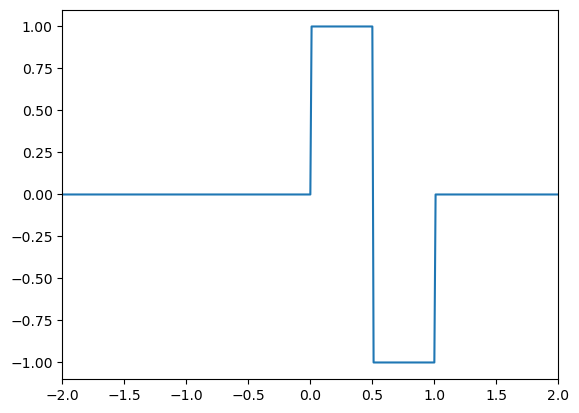

In [16]:
plt.plot(time, haar_t)
plt.xlim(-2,2)
plt.show()

In [17]:
freq = np.arange(0,12,0.01)
haar_f = []
for i in range(len(freq)):
    haar_f.append(haar(freq[i]))
    
haar_t_fft = fft(haar_f)/100

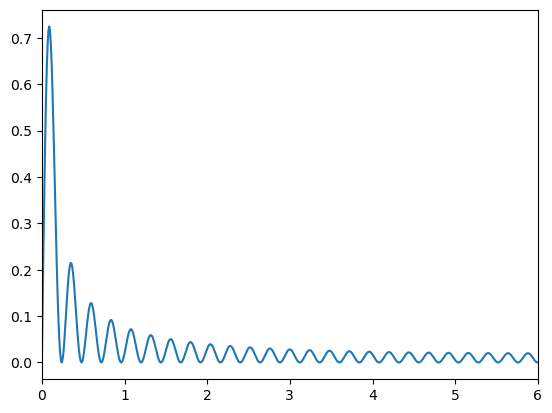

In [18]:
plt.plot(freq, np.abs(haar_t_fft))
plt.xlim(0,6)
plt.show()

------------------------------

Рассмотреть произвольный сигнал с шумом.

Реализовать свертку сигнала с вейвлетами Морле, вейвлетом “Мексиканская шляпа” и
вейвлетом Хаара.

Осуществить фильтрацию сигналов с помощью этих 3-х вейвлетов.

Отметить сильные и слабые стороны каждого из вейвлетов.

In [19]:
y_noise = np.random.normal(0,1,len(time))
y = np.cos(50 * 2.0*np.pi*time)
signal = y+y_noise
signal_fft = fft(signal)

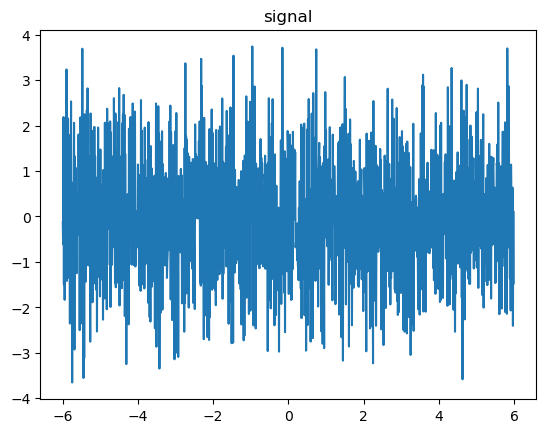

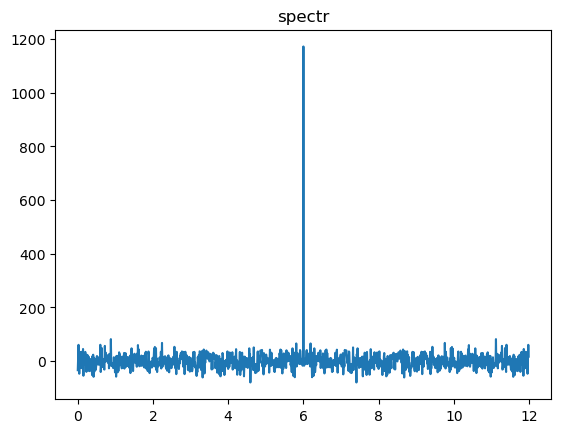

In [20]:
plt.plot(time, signal)
plt.title('signal')
plt.show()
plt.plot(freq, signal_fft)
plt.title('spectr')
plt.show()

In [21]:
morle_conv = np.convolve(signal, morle_t, mode='same')

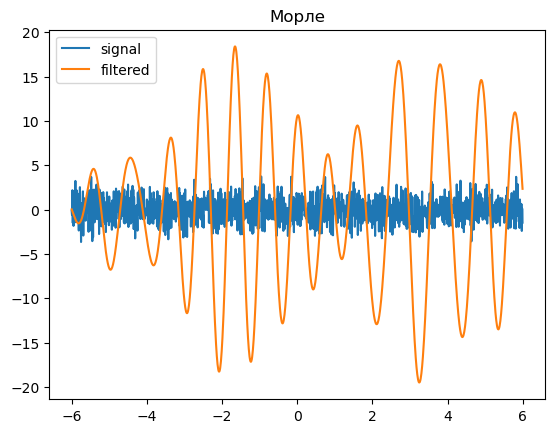

In [22]:
plt.plot(time, signal, label = 'signal')
plt.plot(time, morle_conv, label = 'filtered')
plt.legend()
plt.title('Морле')
plt.show()

In [23]:
mexican_conv = np.convolve(signal, mexican_h, mode='same')

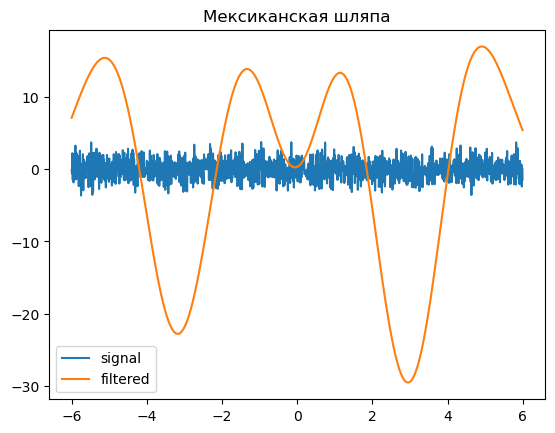

In [24]:
plt.plot(time, signal, label = 'signal')
plt.plot(time, mexican_conv, label = 'filtered')
plt.title('Мексиканская шляпа')
plt.legend()
plt.show()

In [25]:
haar_conv = np.convolve(signal, haar_t, mode='same')

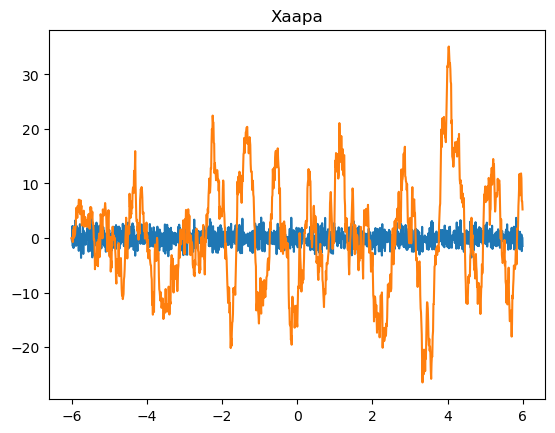

In [26]:
plt.plot(time, signal, label = 'signal')
plt.plot(time, haar_conv, label = 'filtered')
plt.title('Хаара')
plt.show()

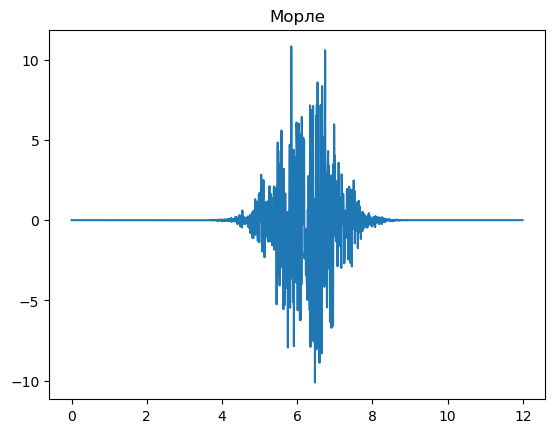

In [27]:
plt.plot(freq, signal*morle_f)
plt.title('Морле')
plt.show()

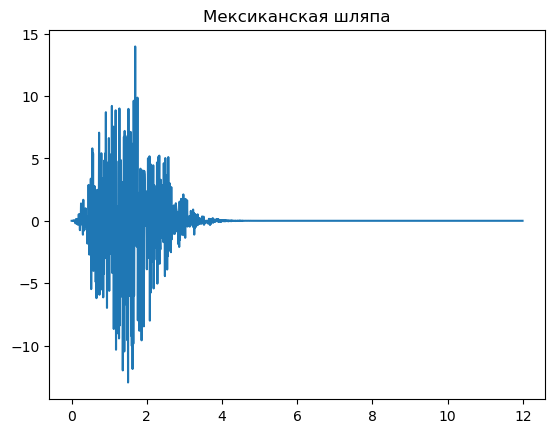

In [28]:
plt.plot(freq, signal*mexican_f)
plt.title('Мексиканская шляпа')
plt.show()

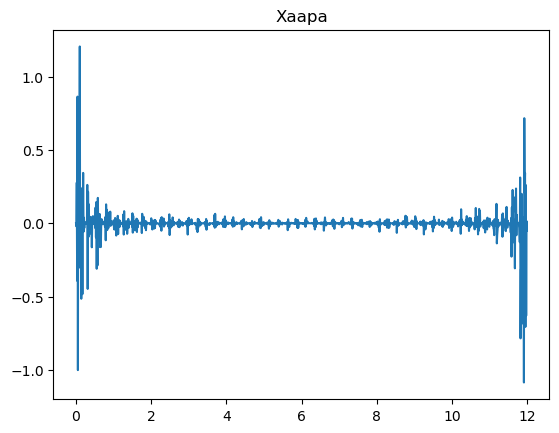

In [29]:
plt.plot(freq, signal*haar_t_fft)
plt.title('Хаара')
plt.show()

-------------------

На рис 4.(а) приведен сигнал, частота которого меняется со временем. 
представлена спектрограмма данного сигнала, которая получена в результате сверки
сигнала с вейвлетом Морле. Реализовать данный код на языке программирования
Python. Разобраться в построении спектрограммы.
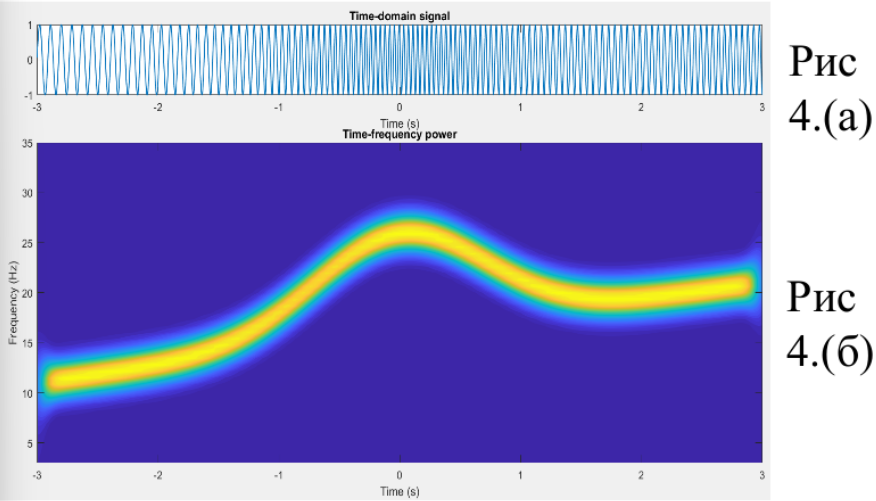

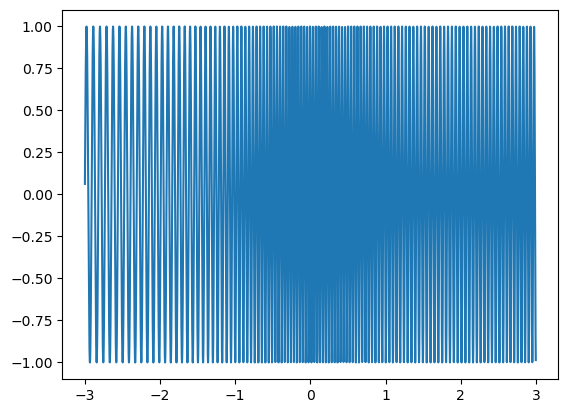

In [30]:
N = 1000
time = np.arange(-3,3, 1/N)
pnts  = len(time)
freqmod = np.exp(-time**2)*10+10
freqmod = freqmod + np.linspace(0,10,pnts)
signal  = np.sin( 2*np.pi * (time + np.cumsum(freqmod)/N) )

plt.plot(time,signal)
plt.show()

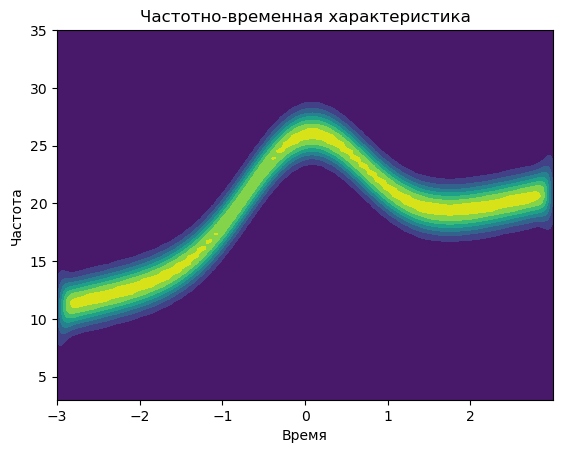

In [52]:
import scipy
from scipy import fftpack

Freq1 = 50
Freq2  = np.linspace(3, 35, Freq1)
fwhm  = .2 

Ws = np.zeros((Freq1, len(time)), dtype=complex) #массив нулей
gauss = np.exp(-(4 * np.log(2) * time**2) / fwhm**2)#гаусс

for wi in range(0, Freq1): #заполняем массив: вейвлет Морле умноженным на гаусса
    Ws[wi, :] = np.exp(1j * 2 * np.pi * Freq2[wi] * time) * gauss
    
conv = pnts * 2-1 #время*2
half = int(np.floor(pnts / 2) + 1)#время/2
sigX = np.fft.fft(signal, conv)#Фурье сигнала и свёртки
tf = np.zeros((Freq1, len(time)))

for fi in range(0, Freq1):
    waveX = np.fft.fft(Ws[fi,:], conv)#вейвлет Морле
    #waveX = waveX / np.max(waveX)
    conv_res = np.fft.ifft(waveX * sigX)#обр преобр Фурье
    conv_res = conv_res[half - 3 : -half]
    tf[fi, :] = np.abs(conv_res)**2
    
plt.contourf(time, Freq2, tf)
plt.title('Частотно-временная характеристика')
plt.show()

-------------

Построить спектрограмму сигнала активности мозга.
Использовать для реализации вейвлет Морле.

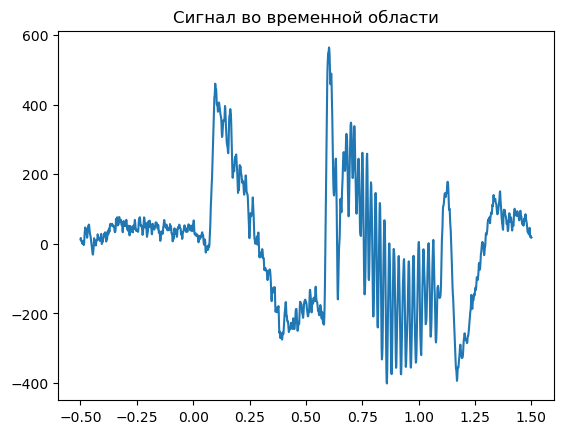

In [45]:
import scipy.io as sio

braindat = sio.loadmat(r'Lab6_Data.mat')
time_vec = braindat['timevec'][0]
s_rate = braindat['srate'][0]
data = braindat['data'][0]

plt.plot(time_vec, data)
plt.title('Сигнал во временной области')
plt.show()

In [46]:
Freq1 = 50 
Freq2  = np.linspace(8, 70, Freq1)
fs  = .2 

Wtime = np.arange(-2, 2, 1 / s_rate)

Ws = np.zeros((Freq1, len(Wtime)), dtype=complex)
gauss = np.exp(-(4 * np.log(2) * Wtime**2) / fs**2)
    
for wi in range(0,Freq1):
    Ws[wi,:] = np.exp(1j * 2 * np.pi * Freq2[wi] * Wtime) * gauss
    
conv = len(time_vec) + len(Wtime) - 1
half = int(np.floor(len(Wtime) / 2))

dataX = np.fft.fft(data, conv)

tf = np.zeros((Freq1, len(time_vec)))

for fi in range(0,Freq1):
    waveX = fft(Ws[fi,:], conv)
    #waveX = waveX/np.max(waveX)

    conv_res = scipy.fftpack.ifft( waveX*dataX )
    conv_res = conv_res[half-1 : -half]
    
    tf[fi,:] = np.abs(conv_res)**2

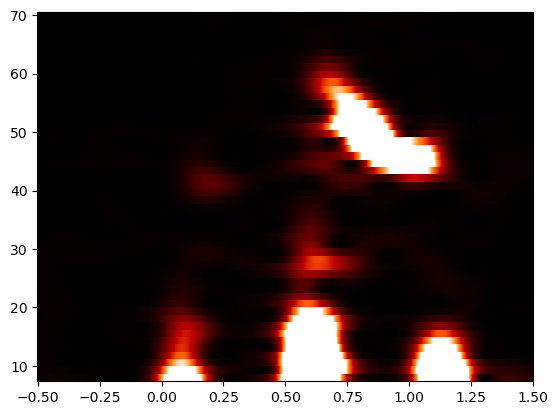

In [47]:
plt.pcolormesh(time_vec, Freq2, tf, vmin=0, vmax=1e3, cmap = 'gist_heat')
plt.show()

--------------

Скачайте с интернета любой аудио
файл, постройте для него
спектрограмму

C:\Users\79132\AppData\Local\Temp\ipykernel_8572\203762626.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


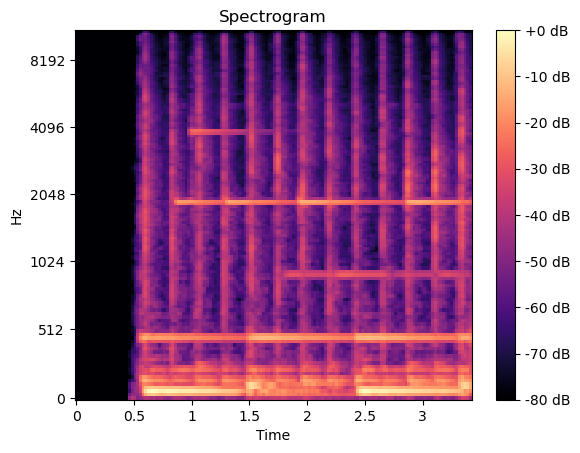

In [48]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

#подгружаю файл
y, sr = librosa.load('hey_hey.wav')

#считаю спектограмму
spec = librosa.feature.melspectrogram(y=y, sr=sr)

#преобразую power в Дцб
spec_db = librosa.power_to_db(spec, ref=np.max)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
img = librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', ax = ax)
fig.colorbar(img, ax = ax, format='%+2.0f dB')
fig.show()